# The Global Suicide Analysis 1985-2015

## 1. The Key Questions

In this analysis I will look at 3 key aspects about the top 30 countries with the highest GPD:
- Which 5 countries have the biggest suicied rate over the years and in the last years?
- In which age category is the biggest increase of the suicide rate of the specific country?
- What is the suicide rate in the next 5 years?

## 2. Data Understanding

To do this analysis I use the Suicide Rates Overview (1985 to 2021) data from kaggle.com (https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021).

At first I load the necessary libraries, load the data and get an overview about the data.

In [206]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from heapq import nsmallest
import matplotlib.ticker as ticker
import plotly.graph_objects as go
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType

In [207]:
df = pd.read_csv("data.csv") # load the CSV data

In [208]:
df.head() # Look at the first 5 rows of the dataset

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.000000,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.000000,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.000000,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.000000,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.000000,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers


- "country-year" is a combination from the columns country+year. This column can be deleted. **This will be done in the next chapter**.
- Year is a time series for each country.
- The GDP is stand for the corresponding year and is the value created through the production of goods and services in a country during a certain period of time. It´s an indicator for the economy performance of an country.
- The same means for the HDI (Human Development Index). It´s an indicator for the development of an country. 
- The column "population" is the population per age area and not the whole population of the country.
- The same means for the suicide number (suicides_no) and for the sucide rate per 100.000 people (suicides/100k pop).

In [209]:
df.shape # check the shape of the datafraem

(31756, 12)

There are 31756 rows and 12 columns in the dataset.

In [210]:
df.dtypes # Check the types of the columns

country                object
year                    int64
sex                    object
age                    object
suicides_no           float64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)    float64
generation             object
dtype: object

- There are 6 categorical columns and 6 numeric columns.
- The GPD per year has a some spaces in the name. This needs to be cleaned.
- The GPD per year is an object, but this is wrong. It needs to be convert to a float.
- The "suicides_no" should be transformed to an integer. 

Now I clean the data name of the GDP per year.

In [211]:
df = df.rename({' gdp_for_year ($) ': 'gdp_for_year ($)'}, axis=1) # Rename column

To transform the " gdp_for_year ($) " I need first remove a comma in the number. Then I can transform it.

In [212]:
df = df.replace(',','', regex=True) # Replace all comma

In [213]:
df = df.astype({'gdp_for_year ($)': float}) # Transform to float

In [214]:
#df = df.astype({'suicides_no': int}) # Transform to int

The transformation don´t work, because there are NaN values. **The cleaning and transformation will be done in the next chapter**.

### 2.1. Numeric values

Let´s take a look at the numeric values.

First I plot numeric values as histogramms.

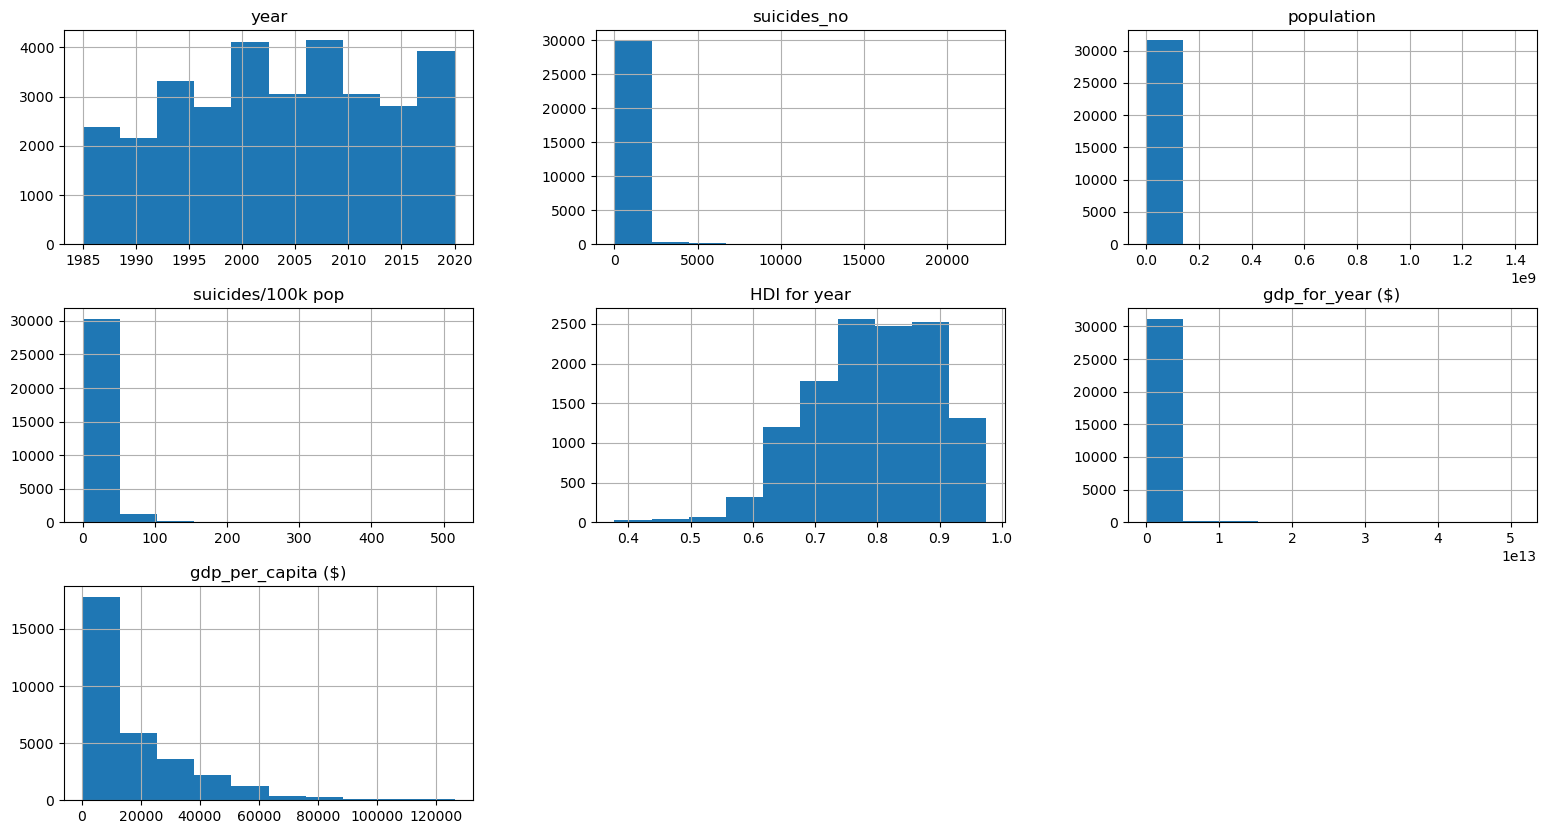

In [215]:
df.hist(figsize=(19,10)); # Show the histogramms of the numeric values

- The frequency of the different years is in the dataset not evenly distribute. 
- Most of the numeric values are right skewed, except of the HDI => The mean is for this columns not the right statistical measurement.
- From this macro perspective, the values of "sucides_no", "suicides/100k pop" and the GDP per year don´t have much variation.
- The x scaling of the popluation looks strang. Probably the problem is the scientific notation.

Let´s look more deeper in the columns:
- 'suicides_no'
- 'suicides/100k pop'
- 'population'
- GPD per year

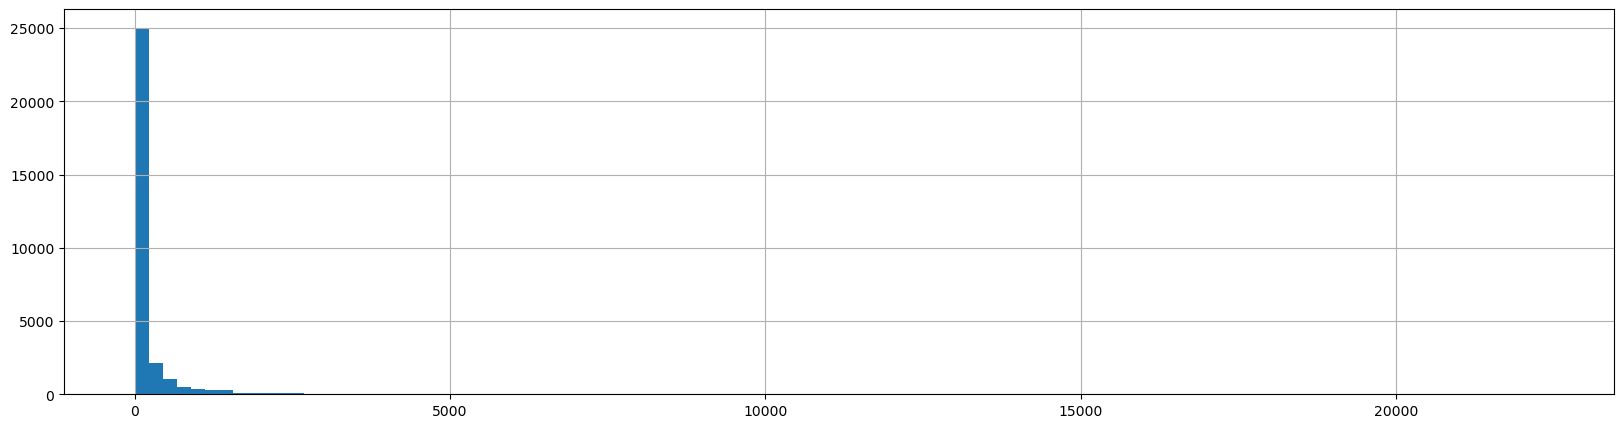

In [216]:
df['suicides_no'].hist(figsize=(20,5), bins=100); # Show the histogramms of the specific column with extreme amount of bins

Even with more bins it looks like there is no variation. Maybe there is a extreme max value.

In [217]:
df['suicides_no'].describe() # Show the statistic characteristics of the specific column

count   30556.000000
mean      237.136242
std       867.956107
min         0.000000
25%         3.000000
50%        25.000000
75%       132.000000
max     22338.000000
Name: suicides_no, dtype: float64

Ok, the problem here is this probebly outlier of 22338. **This needs to be analyzed in the next chapter**.

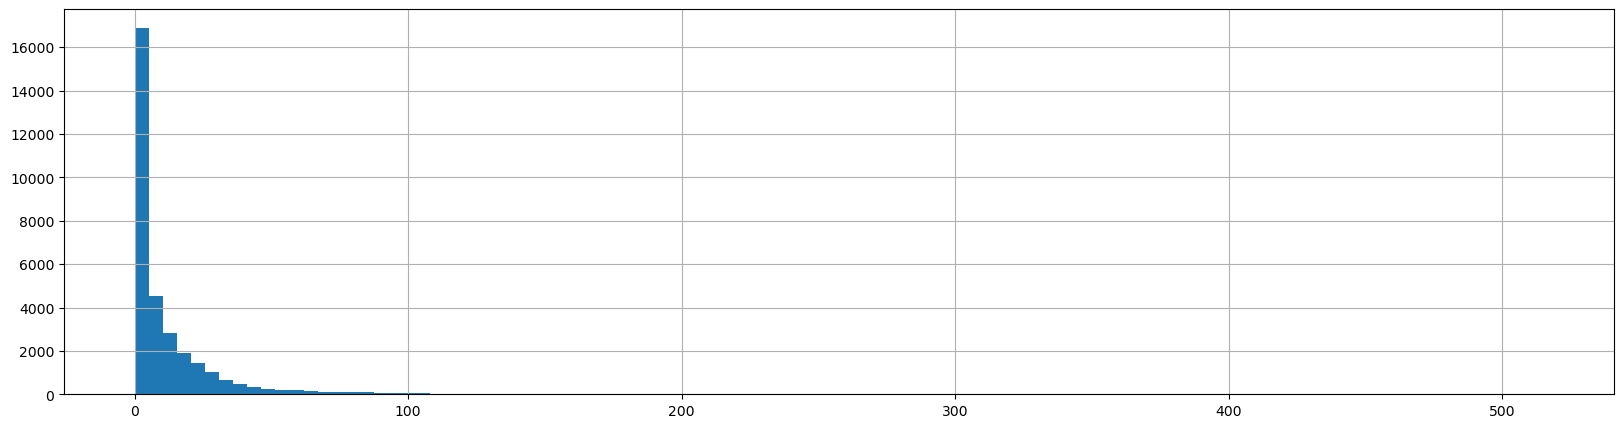

In [218]:
df['suicides/100k pop'].hist(figsize=(20,5), bins=100); # Show the histogramms of the specific column with extreme amount of bins

There is a little bit more variation, but it looks also like that there are extreme values.

In [219]:
df['suicides/100k pop'].describe() # Show the statistic characteristics of the specific column

count   31756.000000
mean       11.716668
std        21.590926
min         0.000000
25%         0.370000
50%         4.285000
75%        14.560000
max       515.092734
Name: suicides/100k pop, dtype: float64

This max value could be corresponding with the max value in the last column. **This needs to be analyzed in the next chapter**.

In [220]:
pd.set_option('float_format', '{:f}'.format) # Clean from the scientific notation
df['population'].describe() # Show the statistic characteristics of the specific column

count        31756.000000
mean       7217454.237435
std       57993230.362607
min            278.000000
25%         128821.000000
50%         546832.500000
75%        2908763.000000
max     1411100000.000000
Name: population, dtype: float64

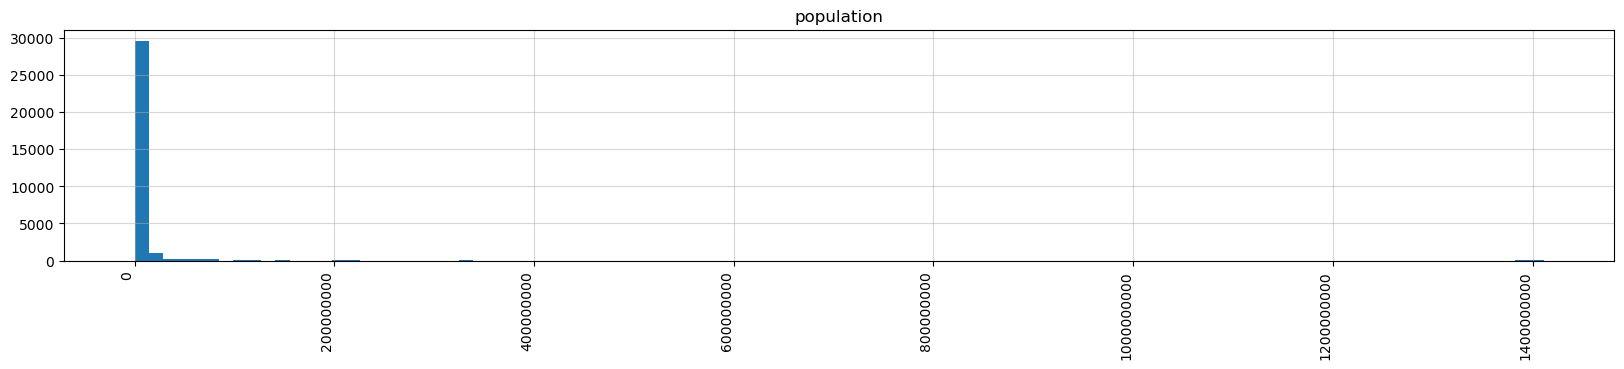

In [221]:
plt.figure(figsize=(20,3)) # Show the histogramms of the specific column with extreme amount of bins and without the scientific notation
ax = plt.axes()
plt.hist(df['population'], bins=100)
plt.title('population')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.5)
plt.ticklabel_format(style='plain')

Here I have the same problem with outlier. **This needs to be analyzed in the next chapter**.

In [222]:
df['gdp_for_year ($)'].describe()

count            31756.000000
mean      572248693464.378052
std      2544260716231.737305
min           46919625.000000
25%        10553337673.000000
50%        55849686539.000000
75%       286519135327.000000
max     51000000000000.000000
Name: gdp_for_year ($), dtype: float64

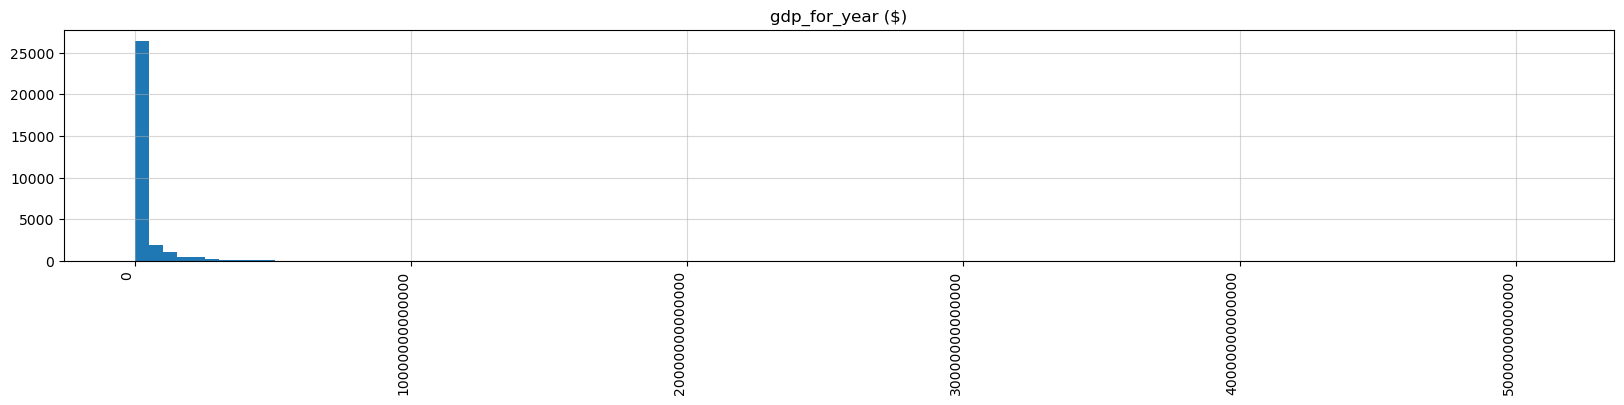

In [223]:
plt.figure(figsize=(20,3)) # Show the histogramms of the specific column with extrem amount of bins and without the scientific notation
ax = plt.axes() 
plt.hist(df['gdp_for_year ($)'], bins=100)
plt.title('gdp_for_year ($)')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.5)
plt.ticklabel_format(style='plain')

Here I have the same problem with outlier. **This needs to be analyzed in the next chapter**.

### 2.2. Categorical values

In the next step I look at the unique values for each categorical value.

In [224]:
# Iterate through the columns and print the corresponding unqiue values
for i in df:
    if df[i].dtypes == "object":
        print(i)
        print(df[i].unique())
        print("______________")

country
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'


- There are alot of different countries. But I choose for a better overview just the top 50 countries with the highest GPD.
- There are no NaN values.
- It seems like that that the country USA appears two times: "United States of America" and "United States". **This needs to be analyzed in the next chapter**.

Now I look at the distribution of the contegorical values. The columns of "gdp_for_year ($)" and "country-year" excluded. GDP because it is numerical and country-year because it´s unnecessary.

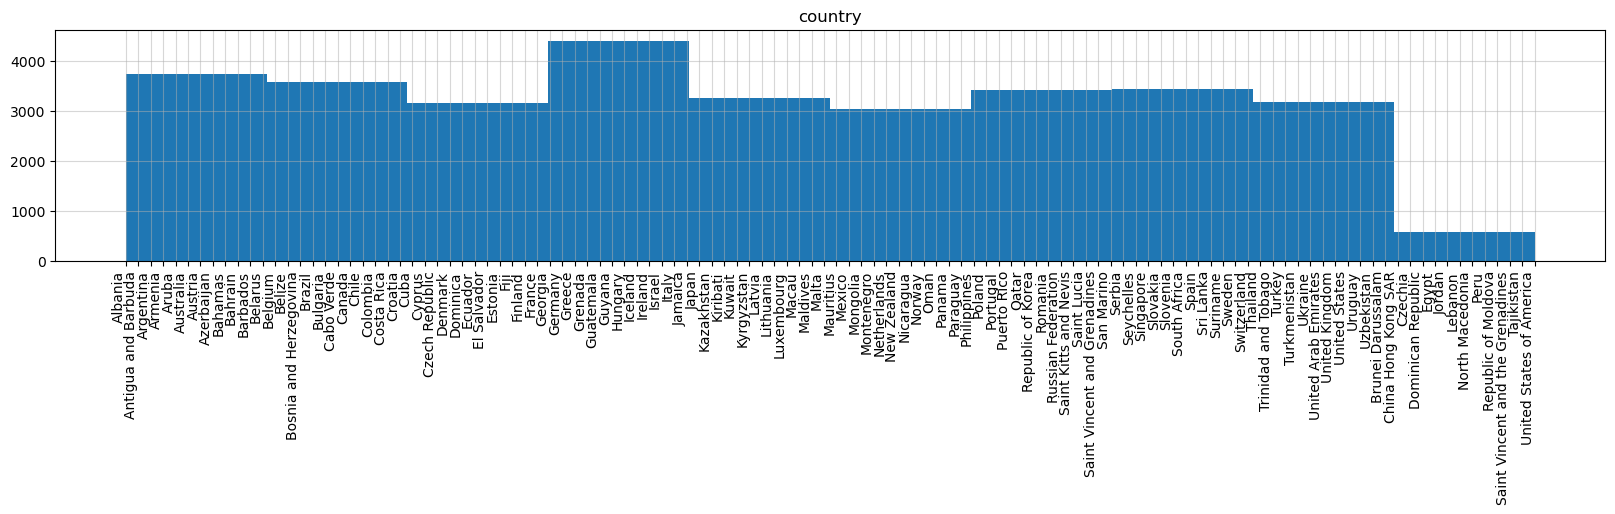

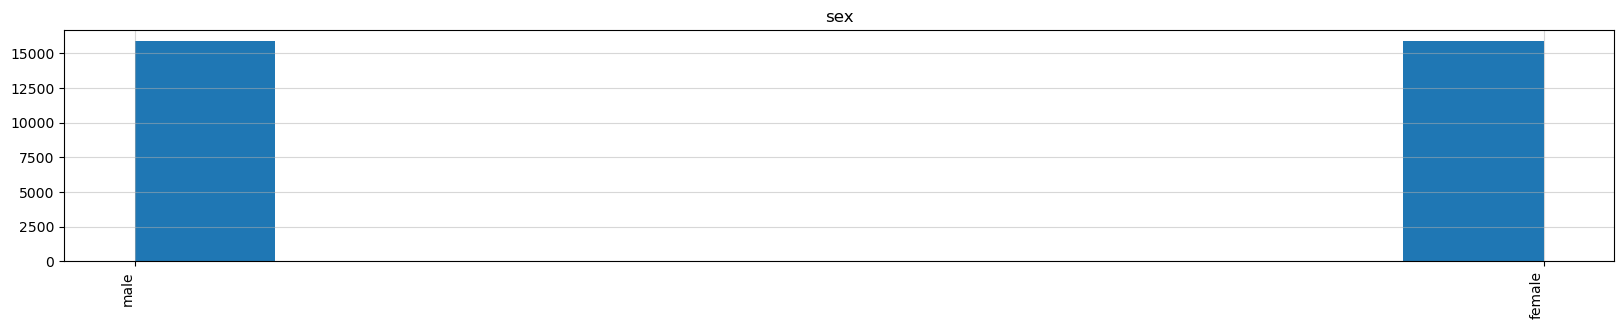

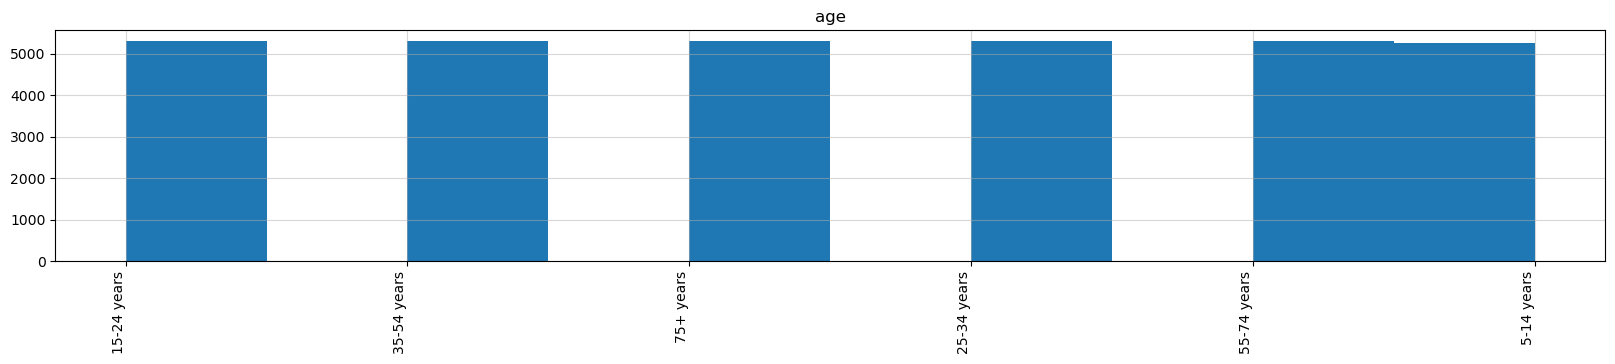

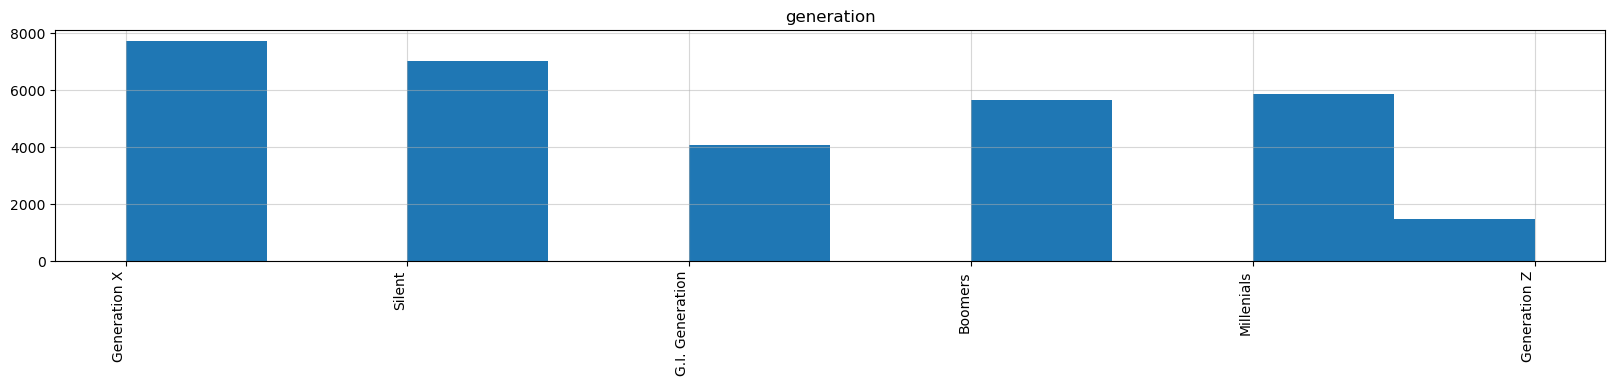

In [225]:
df_obj = df.select_dtypes(include ='object') # Create a subset of object columns
for i in df_obj: # Iterate through all columns and print the corresponding histogramms
    if i != ' gdp_for_year ($) ' and i !='country-year':
        plt.figure(figsize=(20,3))
        ax = plt.axes()
        plt.hist(df_obj[i])
        plt.title(i)
        plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
        plt.grid(alpha=0.5)
        plt.show()

- The frequency of the different countries is in the dataset not evenly distribute. There are countries with just 500 datapoints (e.g. USA). This can have an impact on the analysis, e.g. the machine learning performance.
- It´s similar for the column "generation". Here is the Generation Z underrepresented. 
- The rest of the categorical data is almost evenly distributed.

### 2.3. NaN values

Now I define a function which is visualing the NaN-rate.

In [226]:
def number_na(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    dict_nan_rate - dictonary with the columns as keys and the corresponding NaN-rate
    ''' 
    
    # Create a dictonary to fill it with the columns as keys and the corresponding NaN-rates.
    dict_nan_rate = {}
    for i in df:
        dict_nan_rate[i] = df[i].isna().sum()/len(df[i])
    
    
    # Plot a bar chart with the dictonary
    plt.figure(figsize=(19,8))
    ax = plt.axes()
    plt.bar(list(dict_nan_rate.keys()), list(dict_nan_rate.values()), width=0.3, alpha=0.7)
    plt.title("NaN-rate for all columns of the dataset")
    plt.ylabel("NaN-rate")
    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    plt.grid(alpha=0.5)
    plt.show
    
    return dict_nan_rate

{'country': 0.0,
 'year': 0.0,
 'sex': 0.0,
 'age': 0.0,
 'suicides_no': 0.03778813452575891,
 'population': 0.0,
 'suicides/100k pop': 0.0,
 'country-year': 0.0,
 'HDI for year': 0.6126716211109712,
 'gdp_for_year ($)': 0.0,
 'gdp_per_capita ($)': 0.0,
 'generation': 0.0}

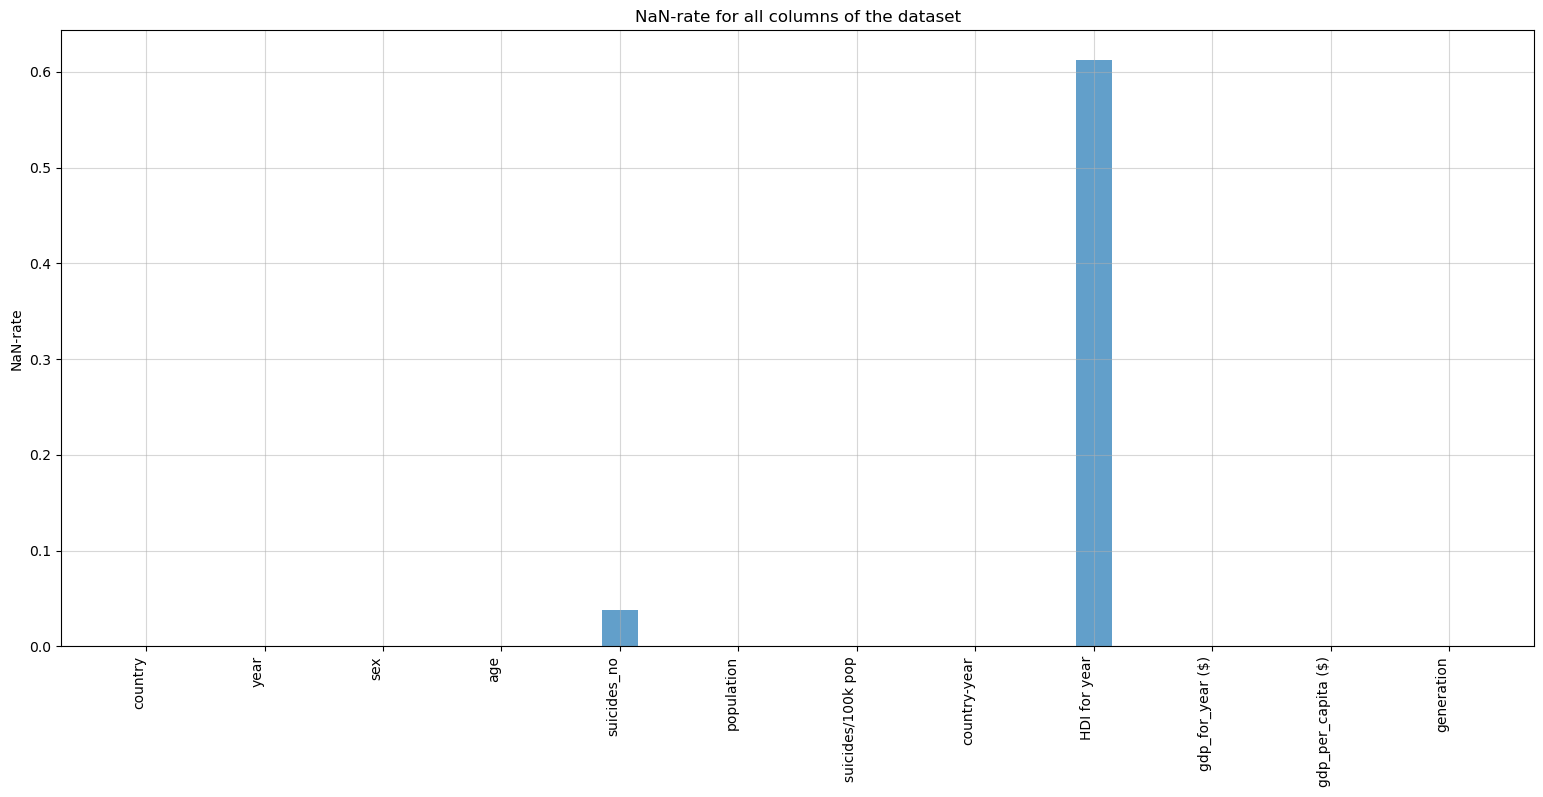

In [227]:
number_na(df)

- The dataset is very good. The are almost no NaN-Values
- For the suicide number I need to check which strategy I use to work with this. **This need to be analyzed in the next chapter**. 
- The same goes for HDI. **This need to be analyzed in the next chapter**. 

## 3. Data Preparation 

Here are the special observations from the last chapter:
- Delete the country-year column
- Transform the suicide number to an integer
- Outlier analyzation of the numeric values
- NaN cleaning
- Twice ouccuring of USA

I start with the deleting of the column.

In [228]:
df = df.drop(columns=['country-year'], axis=1) # Drop a specific column

Then I go to the NaN cleaning.

First I check how much data data is missing

I start with the suicide number. Because this column will be my target value for my machine learning modell the values can be deleted. 

In [229]:
df.groupby(['country', 'year']).mean().loc['United Kingdom']

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,,,,,,
1985,425.416667,4417211.250000,9.704167,0.753000,489285164271.000000,9231.000000
1986,403.250000,4426627.750000,9.334167,NaN,601452653181.000000,11323.000000
1987,382.833333,4436639.000000,8.650833,NaN,745162608269.000000,13996.000000
1988,414.250000,4442565.000000,9.545833,NaN,910122732124.000000,17072.000000
1989,363.416667,4452094.083333,8.265833,NaN,926884816754.000000,17349.000000
1990,386.916667,4463154.500000,8.611667,0.773000,1093169389205.000000,20411.000000
1991,378.916667,4491952.250000,8.233333,NaN,1142797178131.000000,21201.000000
1992,385.666667,4506363.166667,8.229167,NaN,1179659529660.000000,21815.000000
1993,371.833333,4523665.166667,8.070833,NaN,1061388722256.000000,19553.000000


In [230]:
df = df.dropna(subset=['suicides_no'])

Now I look at the HDI. Because the HDI is connected with a country I will analyze the NaN quote of each country.

In [231]:
def na_separation(df, column, na_column):
    '''
    INPUT
    df - pandas dataframe 
    column - column name of a dataframe for the separation of the unqiue values
    na_column - target column for the NaN analyzation
    
    OUTPUT
    dict_nan_country - dictonary with the columns as keys and the corresponding NaN-rate
    ''' 
    
    unique_values = list(df[column].unique())
    # Create a dictonary to fill it with the columns as keys and the corresponding NaN-rates.
    dict_nan_separation = {}
    for i in unique_values:
        dict_nan_separation[i] = df[df[column] == i][na_column].isna().sum()/len(df[df[column] == i])
    
    
    # Plot a bar chart with the dictonary
    plt.figure(figsize=(19,8))
    ax = plt.axes()
    plt.bar(list(dict_nan_separation.keys()), list(dict_nan_separation.values()), width=0.3, alpha=0.7)
    plt.title("NaN-rate for all columns of the dataset")
    plt.ylabel("NaN-rate")
    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    plt.grid(alpha=0.5)
    plt.show

    return dict_nan_separation

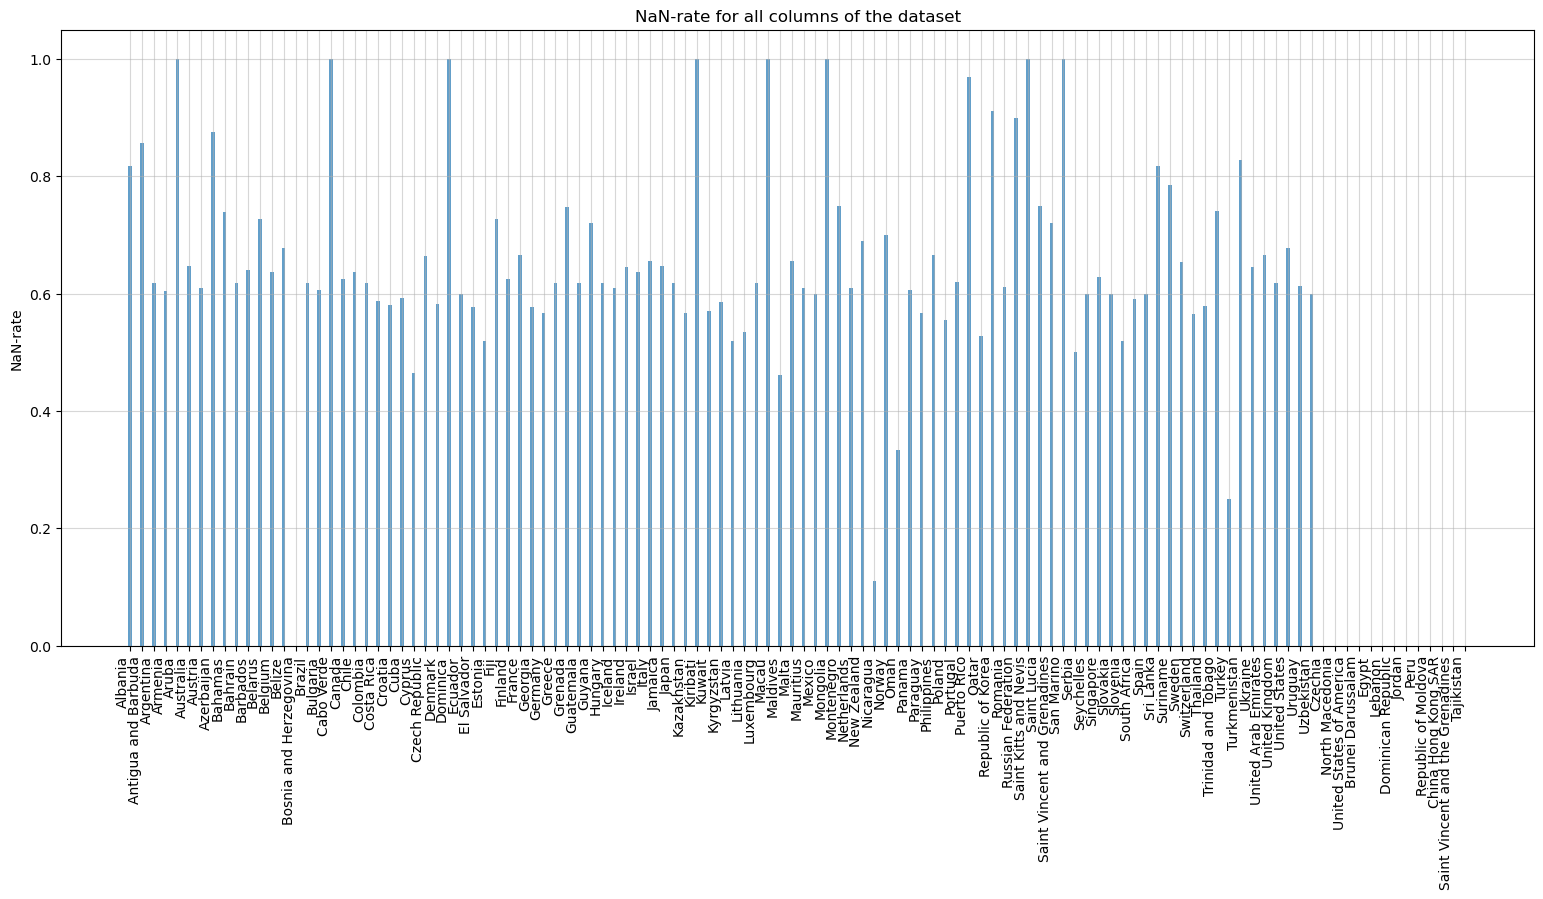

In [232]:
dict_nan_separation = na_separation(df, 'country', 'HDI for year');

Most of the countries have a really high NaN rate.

In [233]:
len(dict((k, v) for k, v in dict_nan_separation.items() if v >= 0.6))/len(dict_nan_separation) # Find the rate of countries with a NaN rate over 60%

0.6491228070175439

Almost 65% of the countries have a NaN rate of over 60%. Because the HDI coupled on the time a filling of the NaN values makes no sense. That´s why the column will deleted.

In [234]:
df = df.drop(columns=['HDI for year'], axis=1) # Drop a specific column

Now I can transform the suicide number to the right data type.

In [235]:
df = df.astype({'suicides_no': int}) # Transform to int

Let´s move to the next point, the outlier detection.

I look at all values which are close to the max value to see if there abnormalities which indicates outlier.

In [236]:
print(len(df[df["suicides_no"]>20000])) # Print the number of rows with a specific condition
df[df["suicides_no"]>20000] # Show subset of dataframe with a specific condition

8


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
20984,Russian Federation,1993,male,35-54 years,20256,18908000,107.130000,435083713851.000000,3160.000000,Boomers
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.300000,395077301248.000000,2853.000000,Boomers
21008,Russian Federation,1995,male,35-54 years,21706,19249600,112.760000,395531066563.000000,2844.000000,Boomers
21020,Russian Federation,1996,male,35-54 years,20562,19507100,105.410000,391719993757.000000,2813.000000,Boomers
21057,Russian Federation,1999,male,35-54 years,20705,21016400,98.520000,195905767669.000000,1412.000000,Boomers
21068,Russian Federation,2000,male,35-54 years,21063,21378098,98.530000,259708496267.000000,1879.000000,Boomers
21080,Russian Federation,2001,male,35-54 years,21262,21476420,99.000000,306602673980.000000,2229.000000,Boomers
21092,Russian Federation,2002,male,35-54 years,20119,21320535,94.360000,345110438692.000000,2527.000000,Boomers


I see here no abnormalities. The suicide rate was truly very high in this ages.

In [237]:
print(len(df[df["population"]>(1*10**9)])) # Print the number of rows with a specific condition
df[df["population"]>(1*10**9)] # Show subset of dataframe with a specific condition

12


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
28078,China Hong Kong SAR,2017,male,5-14 years,3,1396215000,0.000215,12300000000000.000000,8816.986905,Generation X
28406,China Hong Kong SAR,2017,male,15-24 years,54,1396215000,0.003868,12300000000000.000000,8816.986905,Generation X
28734,China Hong Kong SAR,2017,male,25-34 years,62,1396215000,0.004441,12300000000000.000000,8816.986905,Boomers
29062,China Hong Kong SAR,2017,male,35-54 years,148,1396215000,0.010600,12300000000000.000000,8816.986905,Silent
29390,China Hong Kong SAR,2017,male,55-74 years,165,1396215000,0.011818,12300000000000.000000,8816.986905,G.I. Generation
29718,China Hong Kong SAR,2017,male,75+ years,95,1396215000,0.006804,12300000000000.000000,8816.986905,G.I. Generation
30046,China Hong Kong SAR,2017,female,5-14 years,2,1396215000,0.000143,12300000000000.000000,8816.986905,Generation X
30374,China Hong Kong SAR,2017,female,15-24 years,21,1396215000,0.001504,12300000000000.000000,8816.986905,Generation X
30702,China Hong Kong SAR,2017,female,25-34 years,48,1396215000,0.003438,12300000000000.000000,8816.986905,Boomers
31030,China Hong Kong SAR,2017,female,35-54 years,99,1396215000,0.007091,12300000000000.000000,8816.986905,Silent


The high population numbers are also plausible. China has the one of the highest people density at this age.

In [238]:
print(len(df[df["suicides/100k pop"]>500])) # Print the number of rows with a specific condition
df[df["suicides/100k pop"]>500] # Show subset of dataframe with a specific condition

8


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
29028,Republic of Korea,2018,male,35-54 years,1495,297298,502.862448,50500000000000.000000,45492.802020,Silent
29110,Republic of Korea,2017,male,35-54 years,1495,290239,515.092734,47600000000000.000000,43033.440800,Silent
29356,Republic of Korea,2018,male,55-74 years,1495,297298,502.862448,50500000000000.000000,45492.802020,G.I. Generation
29438,Republic of Korea,2017,male,55-74 years,1495,290239,515.092734,47600000000000.000000,43033.440800,G.I. Generation
29684,Republic of Korea,2018,male,75+ years,1495,297298,502.862448,50500000000000.000000,45492.802020,G.I. Generation
29766,Republic of Korea,2017,male,75+ years,1495,290239,515.092734,47600000000000.000000,43033.440800,G.I. Generation
30996,Republic of Korea,2018,female,35-54 years,1495,297298,502.862448,50500000000000.000000,45492.802020,Silent
31078,Republic of Korea,2017,female,35-54 years,1495,290239,515.092734,47600000000000.000000,43033.440800,Silent


Also here I see no abnormalities.

Finally I analyze why USA appears two times as a value for the column "country".

My assumption is that the column is splitted by the years.

In [239]:
df[df["country"]=="United States"]['year'].sort_values() # Show a sorted subset of dataframe with a specific condition

26848    1985
26859    1985
26858    1985
26857    1985
26855    1985
         ... 
27209    2015
27208    2015
27218    2015
27212    2015
27219    2015
Name: year, Length: 372, dtype: int64

In [240]:
df[df["country"]=="United States of America"]['year'].sort_values() # Show a sorted subset of dataframe with a specific condition

29785    2017
31425    2017
31097    2017
30769    2017
30441    2017
30113    2017
29457    2017
29129    2017
28801    2017
31753    2017
28145    2017
28473    2017
28719    2018
30687    2018
28063    2018
30359    2018
30031    2018
31015    2018
29703    2018
31343    2018
31671    2018
29375    2018
29047    2018
28391    2018
29621    2019
31589    2019
30605    2019
28965    2019
30277    2019
28309    2019
27981    2019
29949    2019
31261    2019
29293    2019
28637    2019
30933    2019
31179    2020
31507    2020
30195    2020
30523    2020
28227    2020
29867    2020
29539    2020
29211    2020
28883    2020
28555    2020
30851    2020
27899    2020
Name: year, dtype: int64

My assumption was true. Now I need to connected both subsets.

I just rename both name to "USA".

In [241]:
df = df.replace('United States of America', 'USA') # Rename specific rows
df = df.replace('United States', 'USA') # Rename specific rows

## 4. Analyzation an Modelling

### 4.1. Top 5 countries with the highest suicide rate over the years

In [242]:
df_gb_c_y = df.groupby(['country', 'year']).mean()

In [243]:
top_countries = df.groupby(['country']).mean().nlargest(50, 'gdp_for_year ($)').index.tolist()

In [244]:
pal = list(sns.color_palette(palette='viridis', n_colors=len(top_countries)).as_hex())

fig = go.Figure()
for d,p in zip(top_countries, pal):
    if len(df_gb_c_y.loc[d].index) > 30:
        fig.add_trace(go.Scatter(x = df_gb_c_y.loc[d].index,
                             y = df_gb_c_y.loc[d]['suicides/100k pop'],
                             name = d,
                             line_color = p, 
                             fill=None))

fig.show()

The data don´t looks right. Korea have an incredible increase of the suicide rate and almoste all other countries have an massive decrease of the suicide rate.

Now I need to look much data of the eye-catching values to look for some abnormalities.

In [245]:
df_gb_c_y.loc['Republic of Korea'].loc[2010:2019]

,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
year,,,,,
2010,1296.500000,3966551.250000,43.183333,1094499338703.000000,22994.000000
2011,1325.500000,3983168.083333,42.920833,1202463682634.000000,25157.000000
2012,1179.916667,4001748.750000,36.938333,1222807284485.000000,25464.000000
2013,1202.166667,4020685.333333,35.714167,1305604981272.000000,27060.000000
2014,1152.833333,4038826.416667,32.110833,1411333926201.000000,29120.000000
2015,1125.833333,4055979.333333,32.428333,1382764027114.000000,28410.000000
2017,800.000000,290239.000000,275.634908,47600000000000.000000,43033.440800
2018,822.250000,297298.000000,276.574346,50500000000000.000000,45492.802020
2019,834.166667,304404.000000,274.032755,51000000000000.000000,45819.480080


In [246]:
df_gb_c_y.loc['Germany'].loc[2010:2019]

,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
year,,,,,
2010,835.833333,6529088.916667,12.680833,3417094562649.000000,43614.000000
2011,846.083333,6530928.333333,12.735000,3757698281118.000000,47947.000000
2012,824.666667,6542342.916667,12.359167,3543983909148.000000,45142.000000
2013,840.916667,6439249.000000,12.756667,3752513503278.000000,48563.000000
2014,851.416667,6462697.416667,12.753333,3890606893347.000000,50167.000000
2015,840.666667,6511390.250000,12.528333,3375611100742.000000,43201.000000
2017,646.416667,82657002.000000,0.782047,3680000000000.000000,44542.295200
2018,652.500000,82905782.000000,0.787038,3980000000000.000000,47950.180810
2019,639.250000,83092962.000000,0.769319,3890000000000.000000,46794.899290


The Problem here is that after 2015 all the data of each country isn´t valid. That´s why I cute data at this point.

In [247]:
df = df[df['year'] <= 2015]

In [248]:
df['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011])

In [249]:
df_gb_c_y = df.groupby(['country', 'year']).mean()

In [250]:
top_countries = df.groupby(['country']).mean().nlargest(30, 'gdp_for_year ($)').index.tolist()

In [251]:
pal = list(sns.color_palette(palette='viridis', n_colors=len(top_countries)).as_hex())

fig = go.Figure()
for d,p in zip(top_countries, pal):
    if len(df_gb_c_y.loc[d].index) > 20:
        fig.add_trace(go.Scatter(x = df_gb_c_y.loc[d].index,
                             y = df_gb_c_y.loc[d]['suicides/100k pop'],
                             name = d,
                             line_color = p, 
                             fill=None))

fig.show()

In [269]:
df_sub = df[df['year'] <= 2014]

In [270]:
top5_coun_all =df_sub.groupby(['country']).mean().\
nlargest(30, 'gdp_for_year ($)').nlargest(5, \
'suicides/100k pop').index.tolist()

In [271]:
top5_sr_all = df_sub.groupby(['country']).mean().\
nlargest(30, 'gdp_for_year ($)').nlargest(5,\
'suicides/100k pop')['suicides/100k pop'].tolist()
top5_sr_all = list(np.around(np.array(top5_sr_all),1))

In [272]:
top5_sr_act = df_sub[df_sub['year']>=2014].groupby(['country']).mean().loc[top5_coun_all]['suicides/100k pop'].tolist()
top5_sr_act = list(np.around(np.array(top5_sr_act),1))

In [273]:
bar = (
 Bar(init_opts=opts.InitOpts())
 .add_xaxis(top5_coun_all)
 .add_yaxis('Mean Suicide Rate 1985-2014', top5_sr_all)
 .add_yaxis('Suicide Rate 2015', top5_sr_act)
 .set_global_opts(title_opts=opts.TitleOpts(title='Suicide Rate Comparison', subtitle='Year 1985-2014 to 2015'))
)
bar.render_notebook()